<a href="https://colab.research.google.com/github/ReidelVichot/PUS2022_RVichot/blob/main/Labs/Week6_2/reggression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


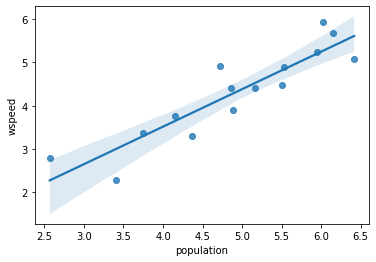

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/walkingsped_Bettencourt07.csv",
                   header=None, names=["population", "wspeed"])

import numpy as np
df["population"] = np.log10(df.population);

import seaborn as sns
sns.regplot(df['population'], df['wspeed']);

In [4]:
def line(x, a, b):
  '''...
  '''
  return a * x + b

In [5]:
def sse(y_o, y_p):
  '''...
  '''
  return ((y_o - y_p)**2).sum() 

In [8]:
minsse = 1.0e7
for a in np.arange(0.5, 2, 0.01):
  for b in np.arange(-1, 1, 0.01):
    prediction = line(df["population"],a ,b)
    thissse = sse(df["wspeed"], prediction)
    if thissse < minsse:
      minsse = thissse
      a_manual, b_manual = a, b


In [9]:
 a_manual, b_manual

(0.8700000000000003, 0.030000000000000915)

In [10]:
x = np.linspace(2.5, 6.5, 5 )

In [13]:
import statsmodels.api as sma
X = sma.add_constant(df["population"])
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,population
0,1.0,3.401401
1,1.0,2.568202
2,1.0,3.752048
3,1.0,4.149219
4,1.0,4.367356
5,1.0,4.720986
6,1.0,4.865104
7,1.0,4.887054
8,1.0,5.161368
9,1.0,5.505150


In [26]:
results = sma.OLS(endog=X, exog=df["wspeed"]).fit()


In [24]:
results.summary()

ValueError: ignored